In [10]:
import numpy as np
import glob
import matplotlib.pyplot as plt

import plotly.express as px
import pandas as pd

from matplotlib.backends.backend_pdf import PdfPages

import plotly.io as pio

import matplotlib.gridspec as gridspec


def power_law(x,alpha,beta):
    return alpha*x**beta

In [11]:
r1a, r1b = 1150,1170
r2a, r2b = 1275,1290
r3a, r3b = 1350,1360
r4a, r4b = 1445,1465
r5a, r5b = 1690,1705
r6a, r6b = 1770,1810
r7a, r7b = 1970,2400
r8a, r8b = 2480,2675
r9a, r9b = 2925,3400

As = [r2a,r3a,r4a,r5a,r6a,r7a,r8a,r9a]
Bs = [r2b,r3b,r4b,r5b,r6b,r7b,r8b,r9b]

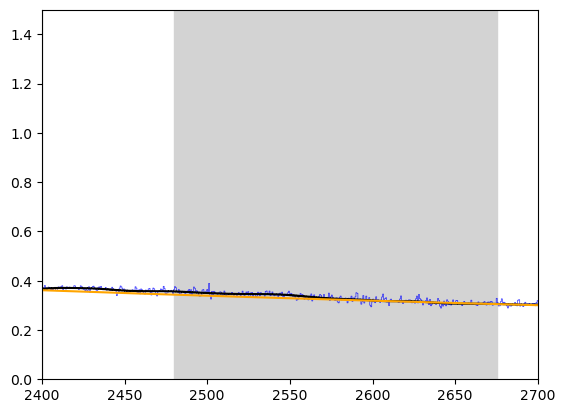

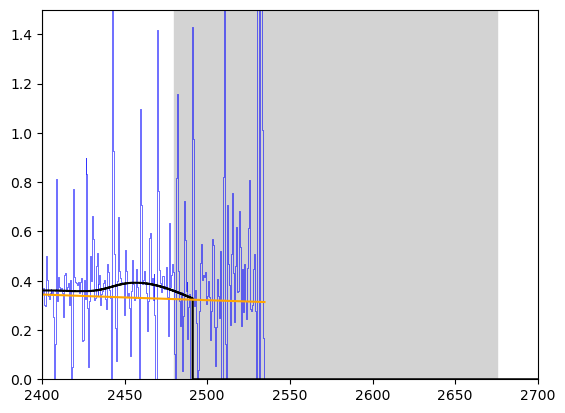

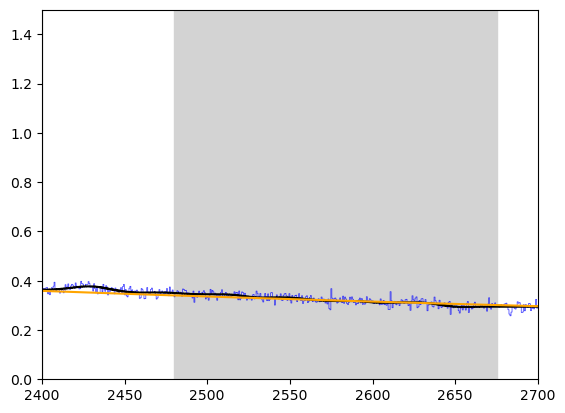

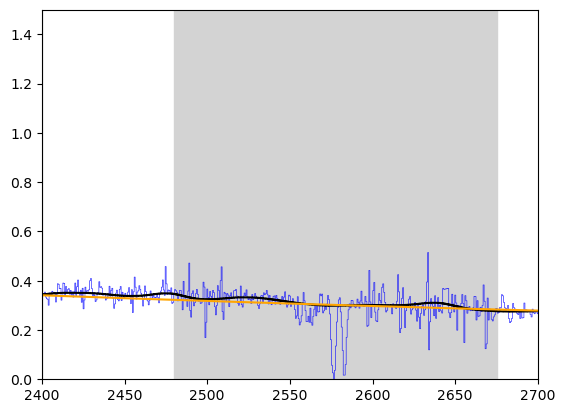

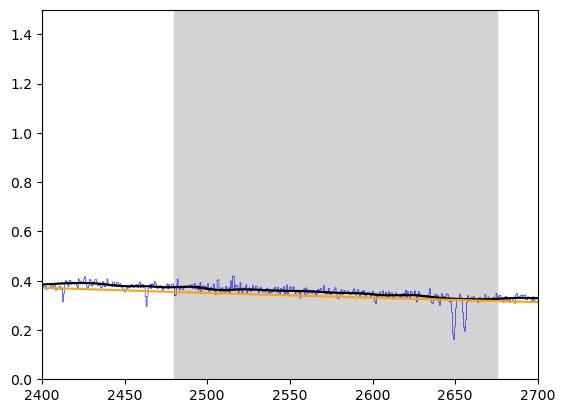

In [12]:
pl_lz = np.loadtxt('/media/bartosz/USB STICK/BOSS_DR14_ext/power_law_fits_spline.txt', dtype='str')
pl_idx = [int(i) for i in pl_lz[:,0]]
pl_alpha = [float(a) for a in pl_lz[:,2]]
pl_beta = [float(b) for b in pl_lz[:,4]]

qso = 'J1335-0328'
nn_hz = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_ext_2.txt', dtype='str')
nn_names = nn_hz[:,0]
qso_idx = np.where(nn_names == qso)[0][0]
nn_idxs = [int(n) for n in nn_hz[:,1:6][qso_idx]]
nn_idxs

alphas = [pl_alpha[pl_idx.index(ni)] for ni in nn_idxs]
betas = [pl_beta[pl_idx.index(ni)] for ni in nn_idxs]

meta_lz = np.loadtxt('/media/bartosz/USB STICK/BOSS_DR14_ext/meta_data_ext_combined.txt', dtype='str')
meta_idx = [int(i) for i in meta_lz[:,0]]
meta_z = [float(z) for z in meta_lz[:,1]]

nn_z = [float(meta_z[meta_idx.index(ni)]) for ni in nn_idxs]


spec_hz = np.loadtxt('/media/bartosz/USB STICK/highz_data/normed/{}_norm.txt'.format(qso))
wl_hz = spec_hz[:,0]
flux_hz = spec_hz[:,1]

for i in range(len(alphas)):
    z = nn_z[i]
    if z<2:
        sf = 'spectra_07_2/'
    elif 2<z<3:
        sf = 'spectra_2_3/'
    elif z>3:
        sf = 'spectra_3_4/'
        
    spec = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'normed/{}_*.txt'.format(nn_idxs[i]))[0])
    wl = spec[:,0]#/(1+z)
    flux = spec[:,1]
    fit = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'fits/{}_*.txt'.format(nn_idxs[i]))[0])
    wl_fit = fit[:,0]
    flux_fit = fit[:,1]
    fig = plt.figure()
    #plt.plot(wl_hz,flux_hz,color='red',drawstyle='steps-mid',linewidth=0.5,alpha=0.6)
    plt.plot(wl,flux,color='blue',drawstyle='steps-mid',linewidth=0.5,alpha=0.8)
    plt.plot(wl_fit,flux_fit,drawstyle='steps-mid',color='black')
    plt.plot(wl,power_law(wl,alphas[i],betas[i]),color='orange')
    for j in range(len(As)):
        plt.axvspan(As[j],Bs[j],color='lightgrey')
    plt.xlim(2400,2700)
    plt.ylim(0,1.5)
    plt.show


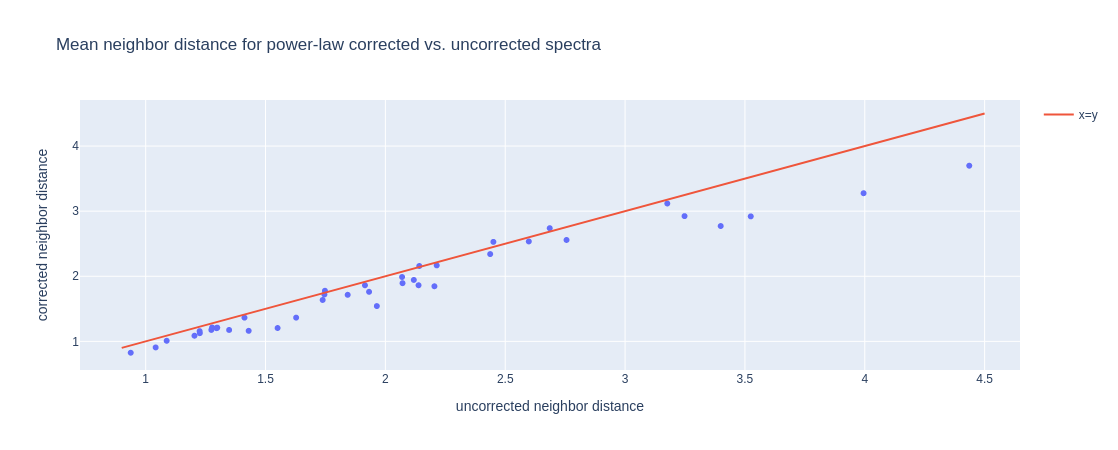

4
(array([21]),)


In [13]:
# nn_ext = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_ext.txt', dtype='str')
# nn_subtr = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_subtr.txt', dtype='str')

# nn_ext = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_ext_2.txt', dtype='str')
# nn_subtr = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_ext_splinePL.txt', dtype='str')

nn_ext = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_uncorr.txt', dtype='str')
nn_subtr = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_ext_plclbound.txt', dtype='str')

# nn_ext = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_ext.txt', dtype='str')
# nn_subtr = np.loadtxt('/media/bartosz/USB STICK/highz_data/highZ_NN_subtr.txt', dtype='str')


nn_ext_dist = [[float(nn) for nn in NN[6:]] for NN in nn_ext]
nn_subtr_dist = [[float(nn) for nn in NN[6:]] for NN in nn_subtr]

nn_ext_mean = [np.mean(nn) for nn in nn_ext_dist]
nn_subtr_mean = [np.mean(nn) for nn in nn_subtr_dist]


data = {
    'uncorrected neighbor distance': nn_ext_mean,
    'corrected neighbor distance': nn_subtr_mean,
    'name': nn_ext[:,0]  
}

df = pd.DataFrame(data)


fig = px.scatter(df, x='uncorrected neighbor distance', y='corrected neighbor distance', hover_data=['name'], title='Mean neighbor distance for power-law corrected vs. uncorrected spectra')
fig.add_scatter(x=[0.9, 4.5], y=[0.9, 4.5], mode='lines', name='x=y')
# fig.add_scatter(x=[nn_ext_mean[21]],y=[nn_subtr_mean[21]],name='PSOJ340-18')
#fig.write_image('plots/powerlaw_corr.pdf')
fig.update_layout(
    autosize=False,
    width=650,
    height=450,
)
# fig.write_image('plots/analysis_plots/dN_corr_vs_uncorr.png')
fig.show()

N=0
for n in range(len(nn_subtr_mean)):
    if nn_subtr_mean[n]>nn_ext_mean[n]:
        N+=1

print(N)
print(np.where(nn_ext[:,0]=='PSOJ340-18'))

0.11243471056528431
[2, 1, 0, 1, 1, 3, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 3, 1, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1]


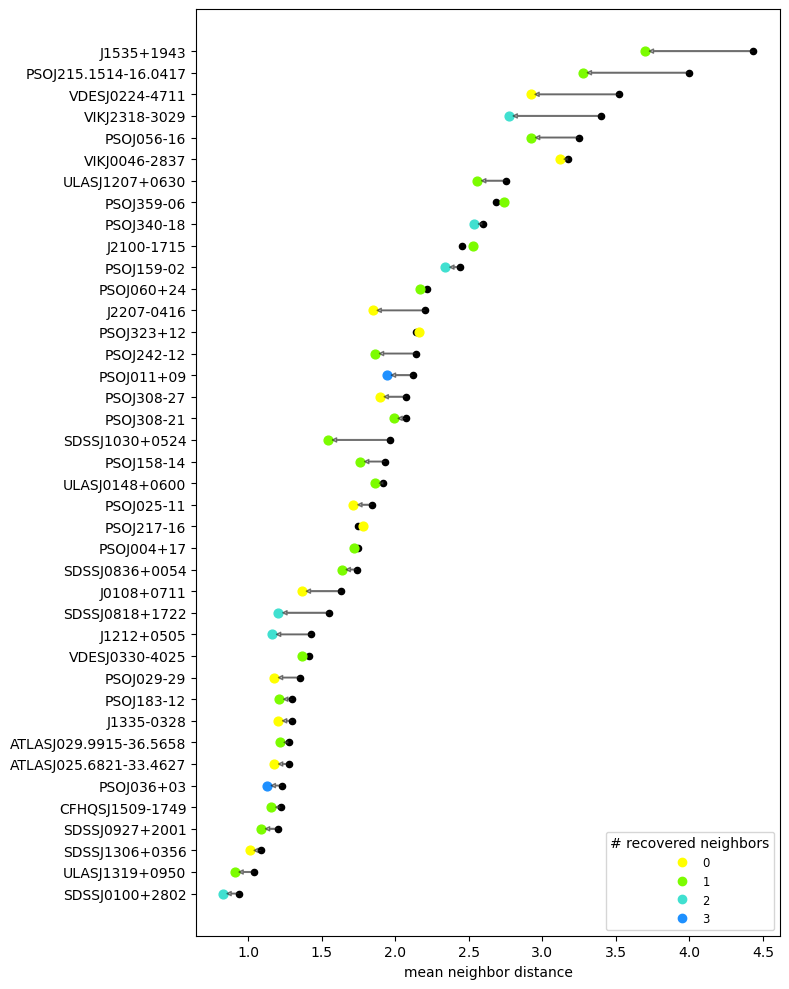

In [14]:
import matplotlib.colors as mcolors

nn_ext_idx = [[int(i) for i in NN[1:6]] for NN in nn_ext]
nn_subtr_idx = [[int(i) for i in NN[1:6]] for NN in nn_subtr]


diff = np.array(nn_ext_mean) - np.array(nn_subtr_mean)
sort_idx = np.argsort(nn_ext_mean)
diff_s = diff[sort_idx]

qnames_s = nn_ext[:,0][sort_idx]
nn_ext_mean_s = np.array(nn_ext_mean)[sort_idx]
nn_subtr_mean_s = np.array(nn_subtr_mean)[sort_idx]

print(diff_s[0])

nn_ext_idx_s = np.array(nn_ext_idx)[sort_idx]
nn_subtr_idx_s = np.array(nn_subtr_idx)[sort_idx]
N=[]
for i in range(len(qnames_s)):
    n=0
    for j in range(5):
        if nn_ext_idx_s[i][j] in nn_subtr_idx_s[i]:
            n+=1
    N.append(n)
print(N)

fig, ax = plt.subplots(figsize=(8, 10))

colors = np.where(diff_s < 0, 'red', 'green')
# markers = np.where(np.array(N) < 2, 'o', '^')
marker_dict = {0:'o', 1:'o', 2:'^', 3:'^'}

# ax.scatter(nn_ext_mean_s[diff_s<0], qnames_s[diff_s<0], color='black', label='uncorr')
# ax.scatter(nn_subtr_mean_s[diff_s<0], qnames_s[diff_s<0], color='red', label='corr')
# ax.scatter(nn_ext_mean_s[diff_s>0], qnames_s[diff_s>0], color='black', label='uncorr')
# ax.scatter(nn_subtr_mean_s[diff_s>0], qnames_s[diff_s>0], color='green', label='corr')

for i in range(len(qnames_s)):
    x_start = nn_ext_mean_s[i]
    x_end = nn_subtr_mean_s[i]
    if diff_s[i]>0.05:
        x_end+=0.03
    else: continue
    y = qnames_s[i]
    ax.annotate('', xy=(x_end, y), xytext=(x_start, y), 
                arrowprops=dict(facecolor='grey', shrink=0, headwidth=3, headlength=3, width=0.5, alpha=0.5))



for i in range(len(qnames_s)):
    marker=marker_dict[N[i]]
    # if N[i] % 2==0:
    #     fc = 'none'
    # else: fc = colors[i]
    ax.scatter(nn_ext_mean_s[i], qnames_s[i], color='black', s=20, marker='o' ,label='uncorr')
    # ax.scatter(nn_subtr_mean_s[i], qnames_s[i], color=colors[i], s=40, marker=marker, facecolor=fc, label='corr')
    # colors = ['orange','forestgreen','lightseagreen','royalblue']
    # ax.text(nn_subtr_mean_s[i], qnames_s[i], N[i], ha='center', va='center',color='black')# color=colors[N[i]])
    colors = ['yellow','lawngreen','turquoise','dodgerblue']
    ax.scatter(nn_subtr_mean_s[i],qnames_s[i],color=colors[N[i]],s=40,marker='o',label='corr')

handles, labels = ax.get_legend_handles_labels()
custom_handles = [plt.Line2D([0], [0], marker='o', color=colors[0], linewidth=0),
                  plt.Line2D([0], [0], marker='o', color=colors[1], linewidth=0),
                  plt.Line2D([0], [0], marker='o', color=colors[2], linewidth=0),
                  plt.Line2D([0], [0], marker='o', color=colors[3], linewidth=0)]
custom_labels = ['0', '1', '2', '3']

legend = ax.legend(custom_handles, custom_labels, loc='lower right', fontsize='small', title='# recovered neighbors')
plt.xlabel('mean neighbor distance')
plt.tight_layout()
# plt.savefig('plots/analysis_plots/dN_change.png',bbox_inches='tight')
plt.show()

In [21]:
qso = 'PSOJ340-18'
z = 5.999
w1l = 13450 / (1+z)    # water absorption observed WL
w1r = 14250 / (1+z)
idx_qso = np.where(nn_ext[:,0]==qso)[0][0]

nn_ext_qso = nn_ext[idx_qso][1:6]
nn_subtr_qso = nn_subtr[idx_qso][1:6]

print(nn_ext_qso)
print(nn_subtr_qso)


['295573' '127122' '412251' '84445' '129741']
['375198' '401497' '295573' '316090' '129741']


In [24]:
nn_ext_qso=[127122]
nn_pl = [pl_idx.index(int(nn))for nn in nn_ext_qso]
nn_alphas = [pl_alpha[idx] for idx in nn_pl]
nn_betas = [pl_beta[idx] for idx in nn_pl]


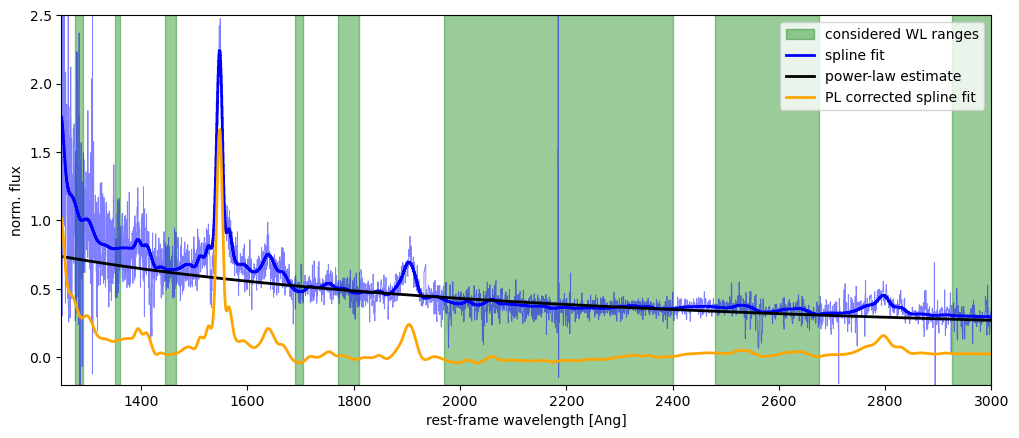

In [60]:
fig,ax = plt.subplots()
fig.set_figwidth(12)
for i,nn in enumerate(nn_ext_qso):
    z = meta_z[meta_idx.index(int(nn))]
    
    if z<2:
        sf = 'spectra_07_2/'
    elif 2<z<3:
        sf = 'spectra_2_3/'
    elif z>3:
        sf = 'spectra_3_4/'
        
    spec = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'normed/{}_*.txt'.format(int(nn)))[0])
    wl = spec[:,0]#/(1+z)
    flux = spec[:,1]
    fit = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'fits/{}_*.txt'.format(int(nn)))[0])
    wl_fit = fit[:,0]
    flux_fit = fit[:,1]


    alpha = nn_alphas[i]
    beta = nn_betas[i]
    for j,a in enumerate(As):
        ax.axvspan(As[j],Bs[j],color='green',alpha=0.4)

    ax.axvspan(1000,1001,color='green',alpha=0.4,label='considered WL ranges')
    ax.plot(wl,flux,drawstyle='steps-mid',linewidth=0.6,color='blue',alpha=0.5)
    ax.plot(wl_fit,fit[:,1],drawstyle='steps-mid',linewidth=2,color='blue',label='spline fit')
    ax.plot(x,power_law(x,alpha,beta),alpha=1,color='black',lw=2,label='power-law estimate')
    # ax.plot(wl,flux-power_law(wl,alpha,beta),drawstyle='steps-mid',lw=0.6,c='blue',alpha=0.5)
    ax.plot(wl_fit,fit[:,1]-power_law(wl_fit,alpha,beta),color='orange',lw=2,label='PL corrected spline fit')
    #plt.ylim(0,max(flux)/3)
    ax.set_ylim(-0.2,2.5)
    ax.set_xlim(1250,3000)
    ax.legend(loc='upper right')

plt.ylabel('norm. flux')
plt.xlabel('rest-frame wavelength [Ang]')
plt.savefig('plots/GalaxyCoffee/powerlaw2.pdf',bbox_inches='tight')
plt.show()
plt.close()

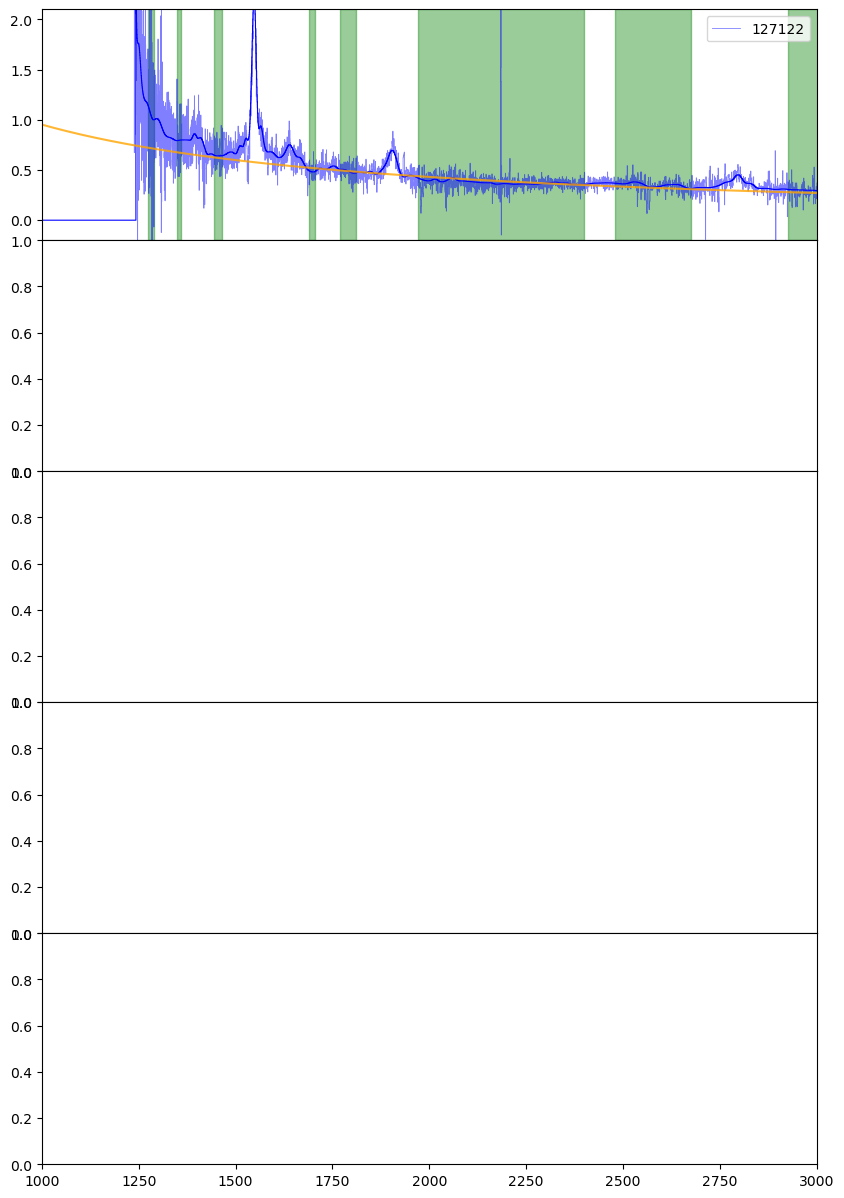

In [25]:
x = np.arange(1000,3000,0.5)

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(15)

gs = gridspec.GridSpec(5, 1)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)
ax3 = plt.subplot(gs[2], sharex=ax1)
ax4 = plt.subplot(gs[3], sharex=ax1)
ax5 = plt.subplot(gs[4], sharex=ax1)
ax = [ax1,ax2,ax3,ax4,ax5]

for i,nn in enumerate(nn_ext_qso):
    z = meta_z[meta_idx.index(int(nn))]
    
    if z<2:
        sf = 'spectra_07_2/'
    elif 2<z<3:
        sf = 'spectra_2_3/'
    elif z>3:
        sf = 'spectra_3_4/'
        
    spec = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'normed/{}_*.txt'.format(int(nn)))[0])
    wl = spec[:,0]#/(1+z)
    flux = spec[:,1]
    fit = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'fits/{}_*.txt'.format(int(nn)))[0])
    wl_fit = fit[:,0]
    flux_fit = fit[:,1]


    alpha = nn_alphas[i]
    beta = nn_betas[i]

    ax[i].plot(wl,flux,drawstyle='steps-mid',linewidth=0.6,color='blue',alpha=0.5,label=nn)
    ax[i].plot(wl_fit,fit,drawstyle='steps-mid',linewidth=0.8,color='blue')
    ax[i].plot(x,power_law(x,alpha,beta),alpha=0.8,color='orange')
    for j,a in enumerate(As):
        ax[i].axvspan(As[j],Bs[j],color='green',alpha=0.4)
    #plt.ylim(0,max(flux)/3)
    ax[i].set_ylim(-0.2,2.1)
    ax[i].set_xlim(1000,3000)
    ax[i].legend(loc='upper right')

ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax4.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Remove the space between subplots
plt.subplots_adjust(hspace=0)
#plt.subplots_adjust(wspace=0)
#ax[i].show()
# plt.savefig('plots/example_pl.png',format='png')

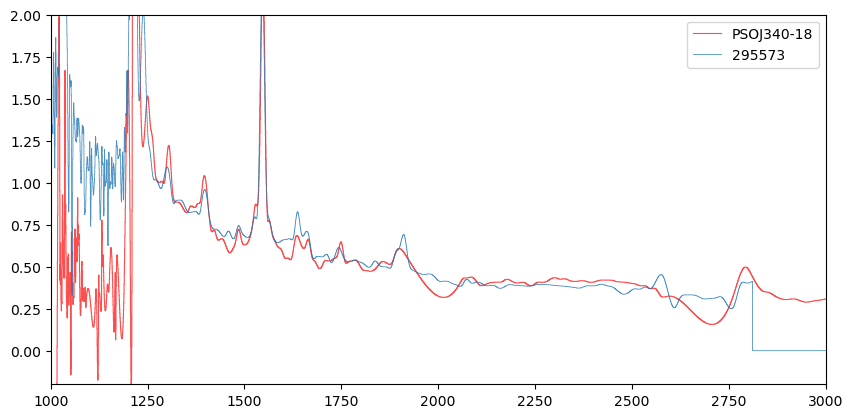

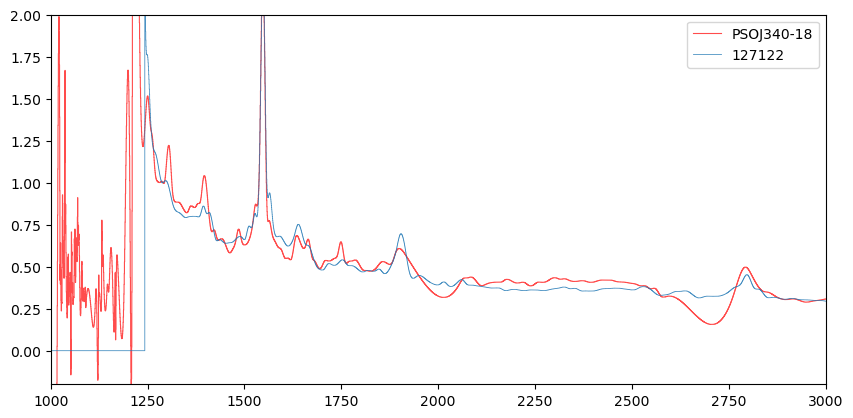

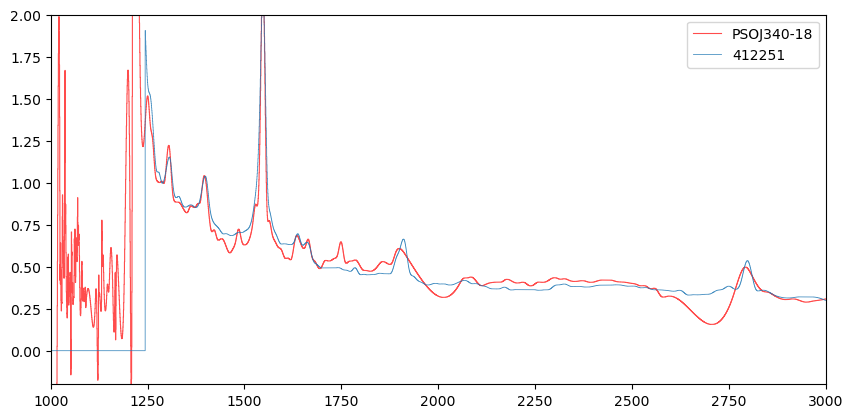

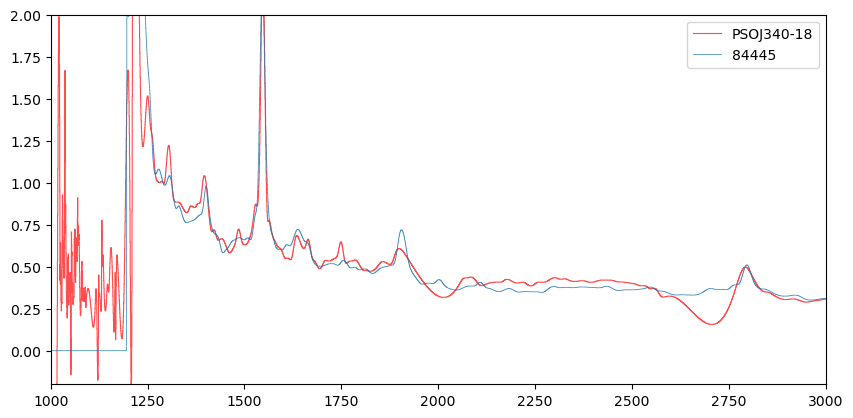

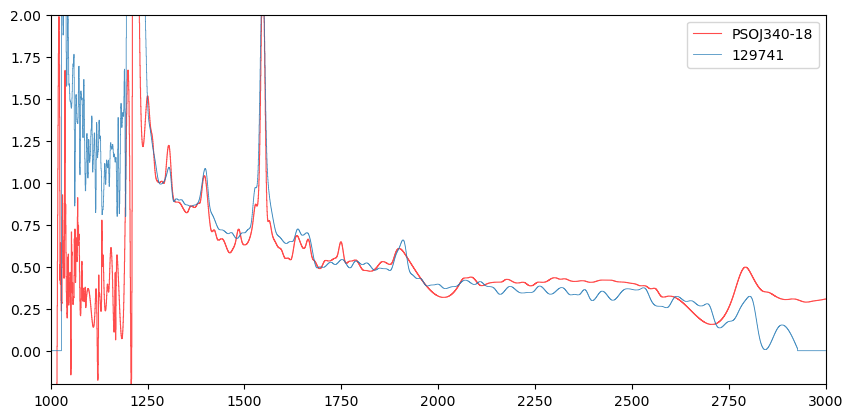

In [8]:
fit_hz = np.loadtxt(glob.glob('/media/bartosz/USB STICK/highz_data/fits/{}_*.txt'.format(qso))[0])
wl_hz = fit_hz[:,0]
flux_hz = fit_hz[:,1]

for i,nn in enumerate(nn_ext_qso):
    z = meta_z[meta_idx.index(int(nn))]
    
    if z<2:
        sf = 'spectra_07_2/'
    elif 2<z<3:
        sf = 'spectra_2_3/'
    elif z>3:
        sf = 'spectra_3_4/'
        
    spec = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'normed/{}_*.txt'.format(int(nn)))[0])
    wl = spec[:,0]#/(1+z)
    flux = spec[:,1]
    fit = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'fits/{}_*.txt'.format(int(nn)))[0])
    wl_fit = fit[:,0]
    flux_fit = fit[:,1]


    # alpha = nn_alphas[i]
    # beta = nn_betas[i]

    fig = plt.figure()
    fig.set_figwidth(10)
    plt.plot(wl_hz,flux_hz,drawstyle='steps-mid',linewidth=0.8,color='red',alpha=0.7,label=qso)
    plt.plot(wl_fit,flux_fit,drawstyle='steps-mid',linewidth=0.6,label=nn,alpha=0.8)
    # plt.plot(x,power_law(x,alpha,beta),alpha=0.8)
    # for j,a in enumerate(As):
    #     plt.axvspan(As[j],Bs[j],color='green',alpha=0.4)
    plt.ylim(-0.2,2)
    plt.xlim(1000,3000)
    plt.legend()
    plt.show()

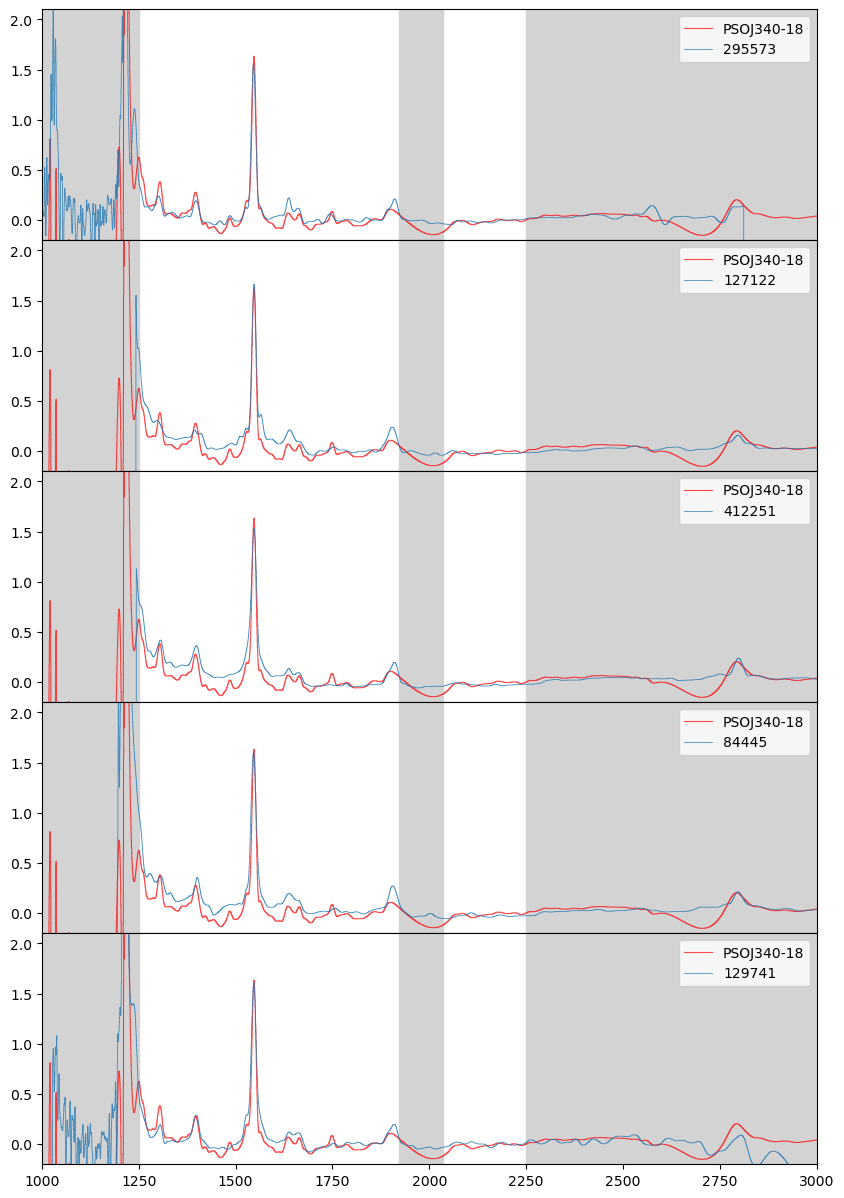

In [53]:
pl_hz = np.loadtxt('/media/bartosz/USB STICK/highz_data/power_law_fits_spline.txt', dtype='str')
alpha_hz = float(pl_hz[np.where(pl_hz[:,0]==qso)[0][0]][1])
beta_hz = float(pl_hz[np.where(pl_hz[:,0]==qso)[0][0]][3])

wl = np.arange(1000,3000,0.5)
mask = np.zeros(len(wl),dtype=bool)
for i,m in enumerate(As):
    mask = np.logical_or(mask, (wl > As[i]) & (wl < Bs[i]))

fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(15)
gs = gridspec.GridSpec(5, 1)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex=ax1)
ax3 = plt.subplot(gs[2], sharex=ax1)
ax4 = plt.subplot(gs[3], sharex=ax1)
ax5 = plt.subplot(gs[4], sharex=ax1)
ax = [ax1,ax2,ax3,ax4,ax5]

for i,nn in enumerate(nn_ext_qso):
    z = meta_z[meta_idx.index(int(nn))]
    
    if z<2:
        sf = 'spectra_07_2/'
    elif 2<z<3:
        sf = 'spectra_2_3/'
    elif z>3:
        sf = 'spectra_3_4/'
        
    spec = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'normed/{}_*.txt'.format(int(nn)))[0])
    wl = spec[:,0]#/(1+z)
    flux = spec[:,1]
    fit = np.loadtxt(glob.glob('/media/bartosz/USB STICK/BOSS_DR14_ext/'+sf+'fits/{}_*.txt'.format(int(nn)))[0])
    wl_fit = fit[:,0]
    flux_fit = fit[:,1]

    alpha = nn_alphas[i]
    beta = nn_betas[i]

    res = np.sum( (flux_fit[mask]-power_law(wl_fit[mask],alpha,beta))**2 )
    tot = np.sum( (flux_fit[mask]-np.mean(flux_fit[mask]))**2 )
    r_squared = 1 - res/tot
    
    ax[i].plot(wl_hz,flux_hz-power_law(wl_hz,alpha_hz,beta_hz),drawstyle='steps-mid',linewidth=0.8,color='red',alpha=0.7,label=qso)
    ax[i].plot(wl_fit,flux_fit-power_law(wl_fit,alpha,beta),drawstyle='steps-mid',linewidth=0.6,label=nn,alpha=0.8)
    # plt.plot(x,power_law(x,alpha,beta),alpha=0.8)
    # for j,a in enumerate(As):
    #     plt.axvspan(As[j],Bs[j],color='green',alpha=0.4)
    ax[i].axvspan(w1l,w1r,color='lightgrey',alpha=1)
    ax[i].axvspan(1000,1250,color='lightgrey',alpha=1)
    ax[i].axvspan(2250,3000,color='lightgrey',alpha=1)
    ax[i].set_ylim(-0.2,2.1)
    ax[i].set_xlim(1000,3000)
    ax[i].legend()
    # plt.show()
    # print(r_squared)

ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax3.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax4.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# Remove the space between subplots
plt.subplots_adjust(hspace=0)
plt.savefig('plots/example_corrnn.png',format='png')

In [8]:
nclipped = np.loadtxt('/media/bartosz/USB STICK/highz_data/power_law_fits_spline_test4.txt',dtype='str')[:,5]
clipped = np.loadtxt('/media/bartosz/USB STICK/highz_data/power_law_fits_spline_test3.txt',dtype='str')[:,5]

ncl = [float(f) for f in nclipped]
cl = [float(f) for f in clipped]

plt.plot(ncl,cl,'.')
plt.plot(np.array([0,1]),np.array([0,1]),lw=0.5)
plt.show()

FileNotFoundError: /media/bartosz/USB STICK/highz_data/power_law_fits_spline_test3.txt not found.

PSOJ060+24


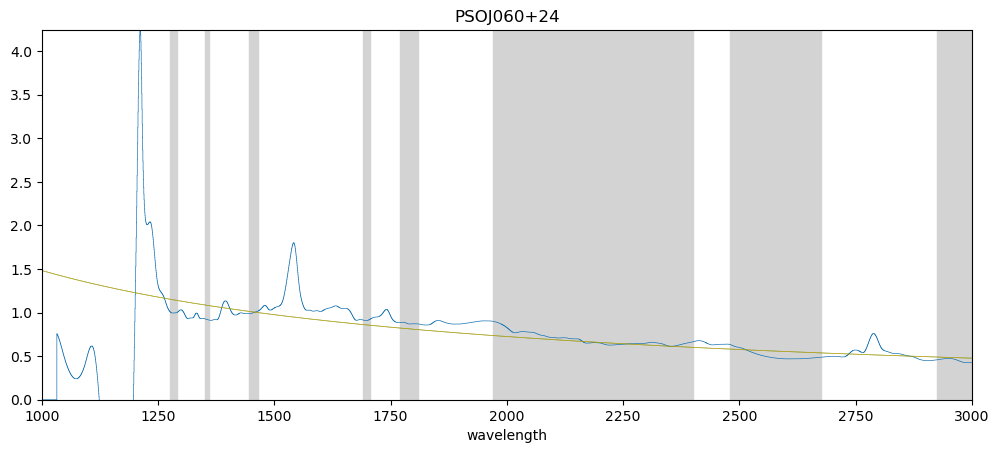

ATLASJ025.6821-33.4627


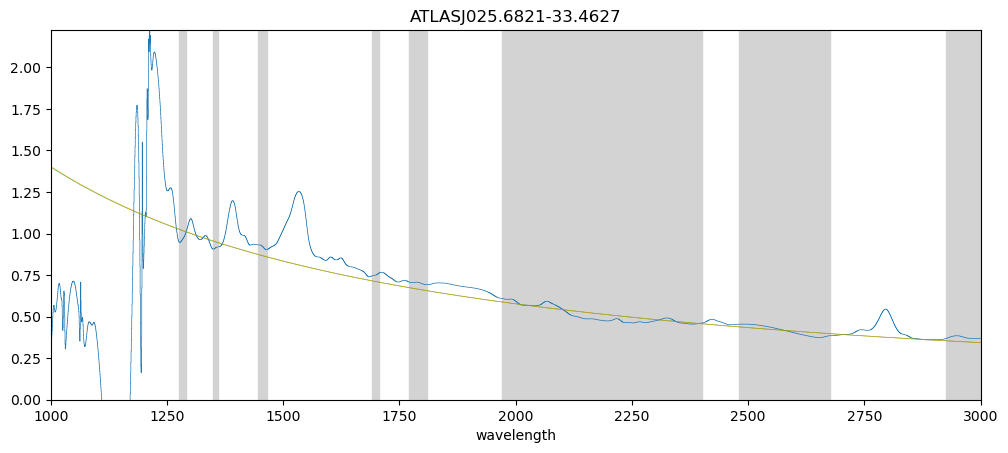

ATLASJ029.9915-36.5658


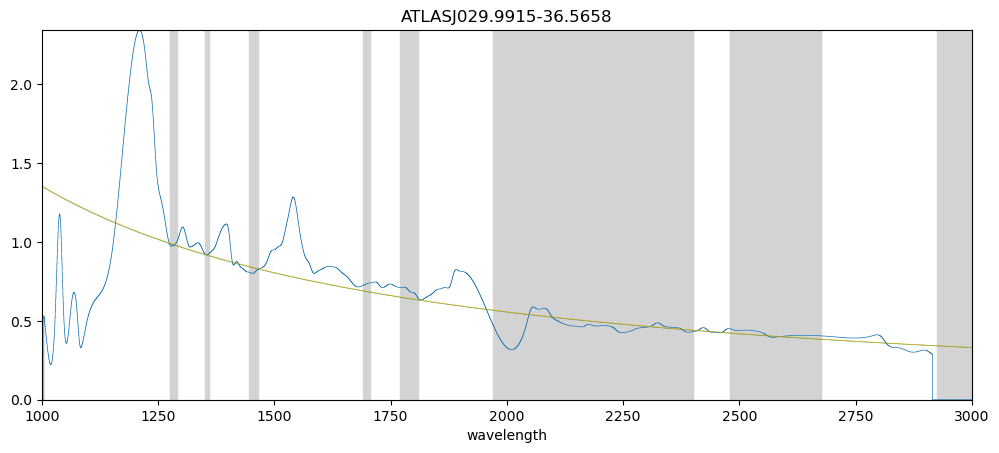

CFHQSJ1509-1749


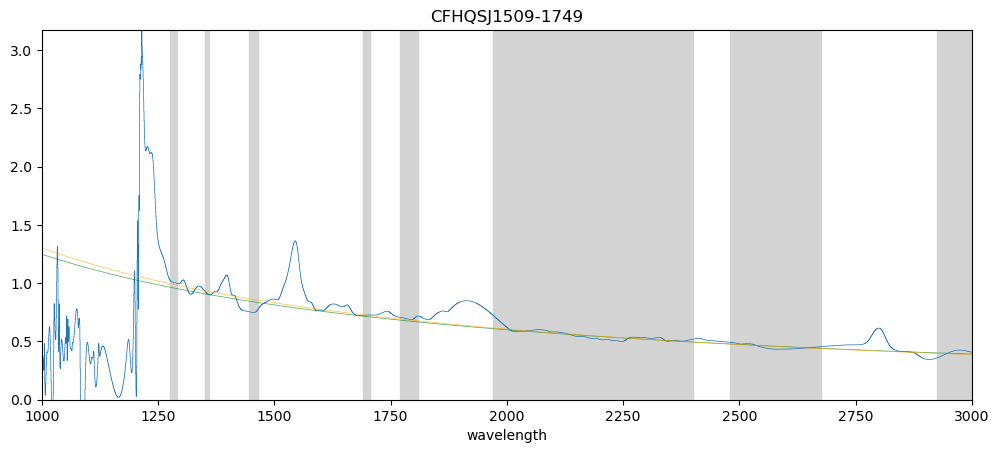

J0108+0711


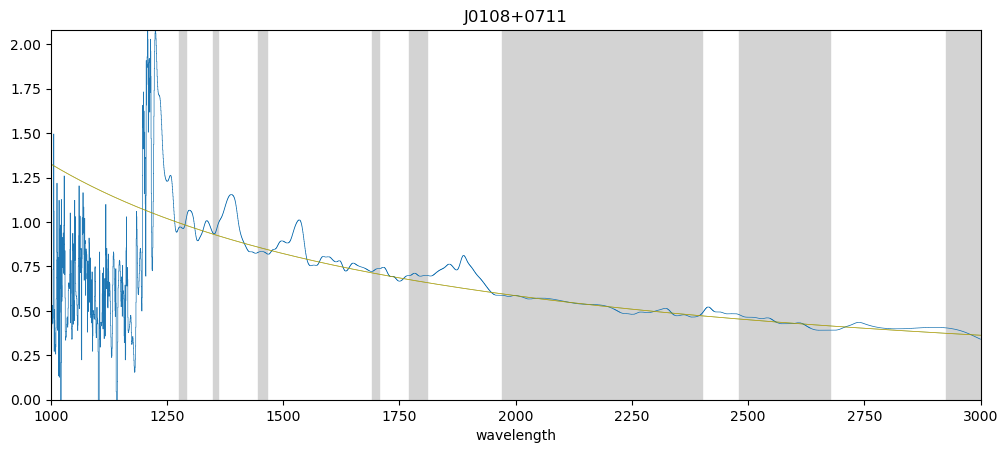

J1212+0505


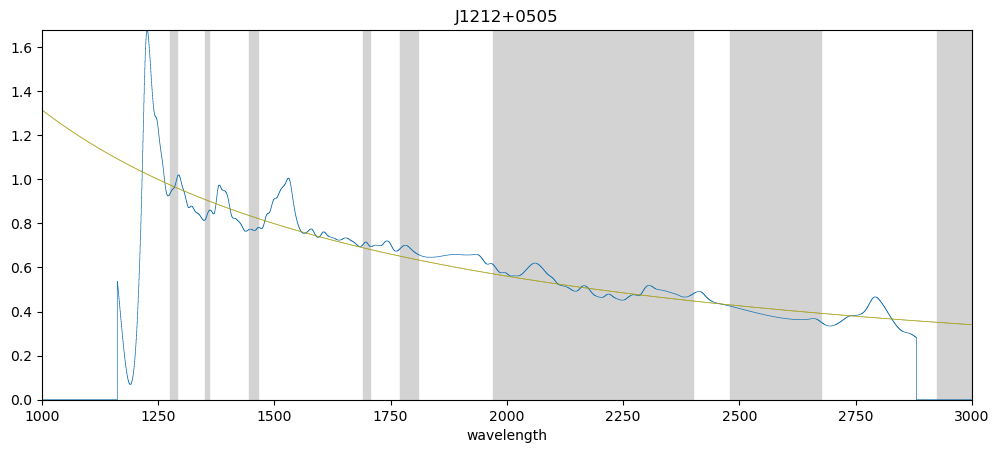

J1335-0328


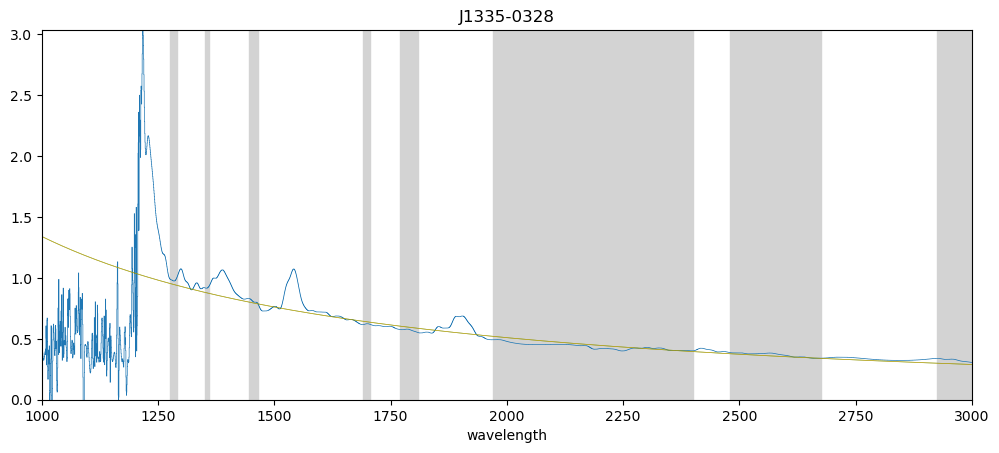

J1535+1943


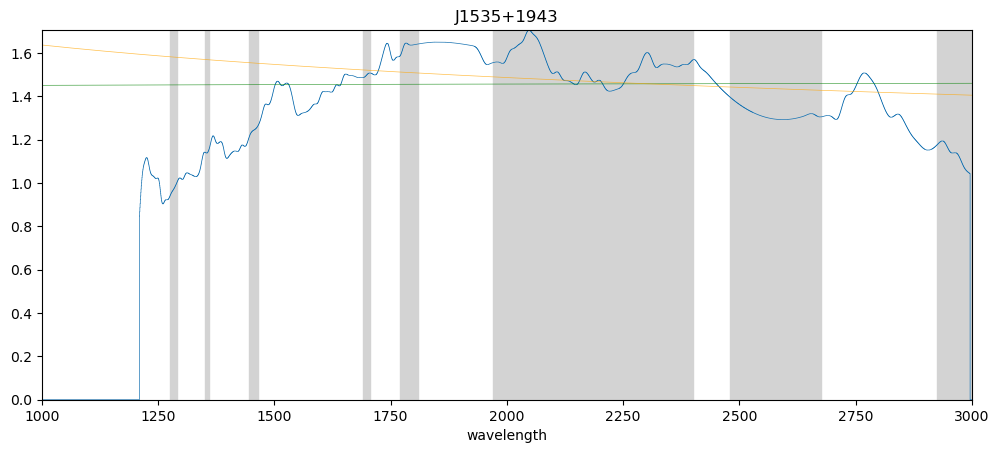

J2100-1715


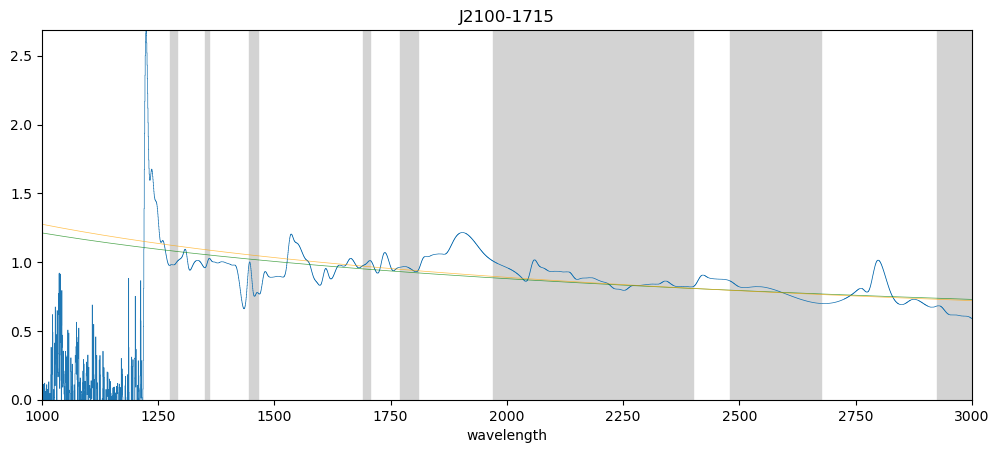

J2207-0416


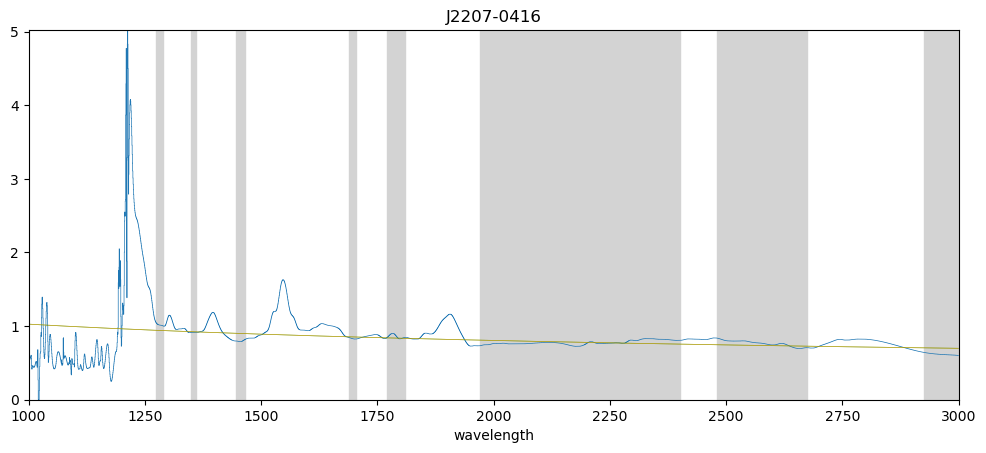

PSOJ004+17


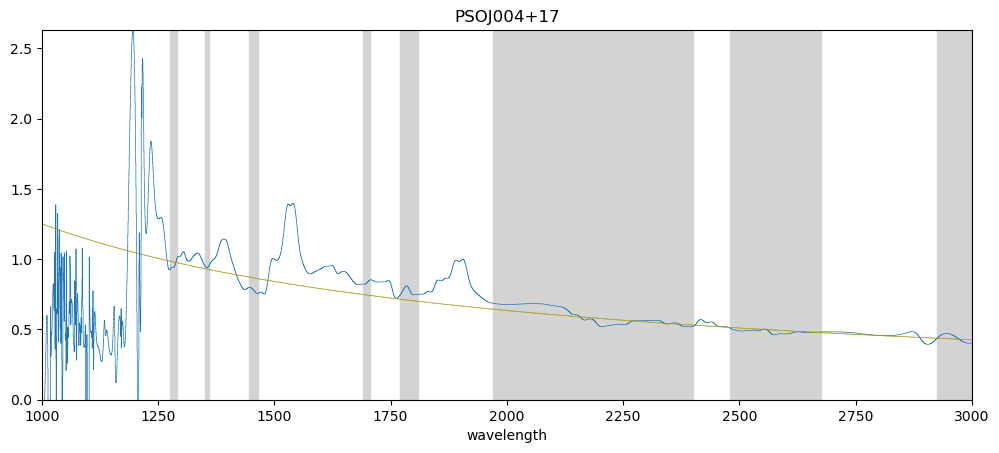

PSOJ011+09


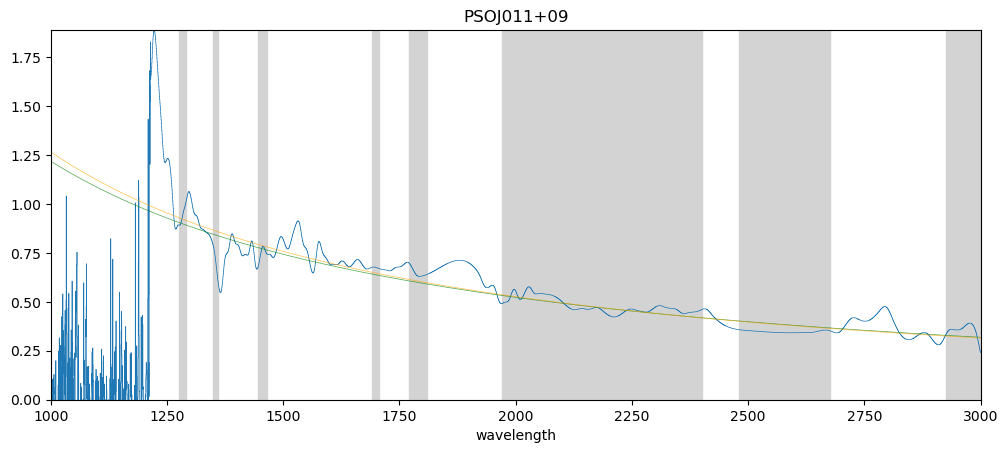

PSOJ025-11


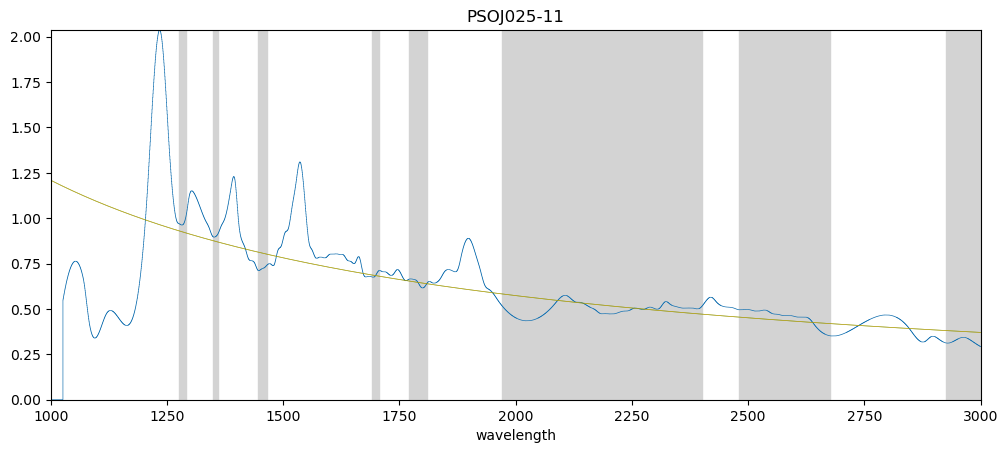

PSOJ029-29


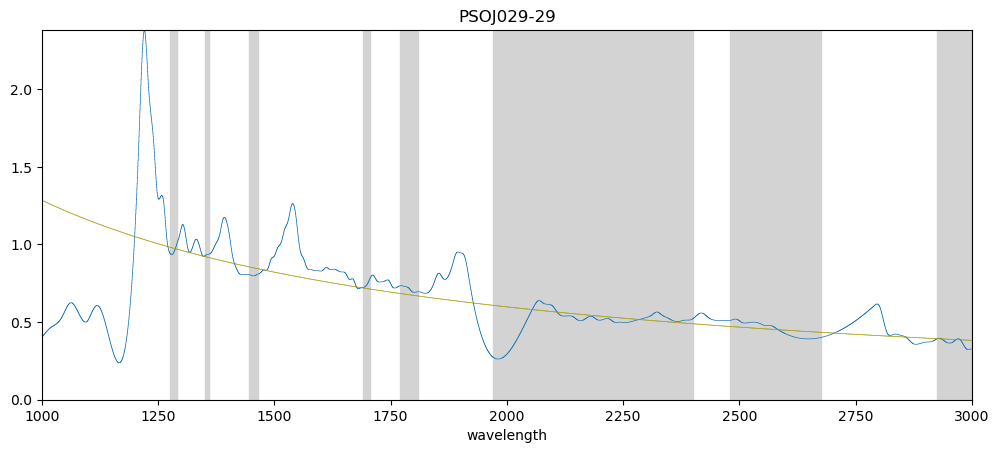

PSOJ036+03


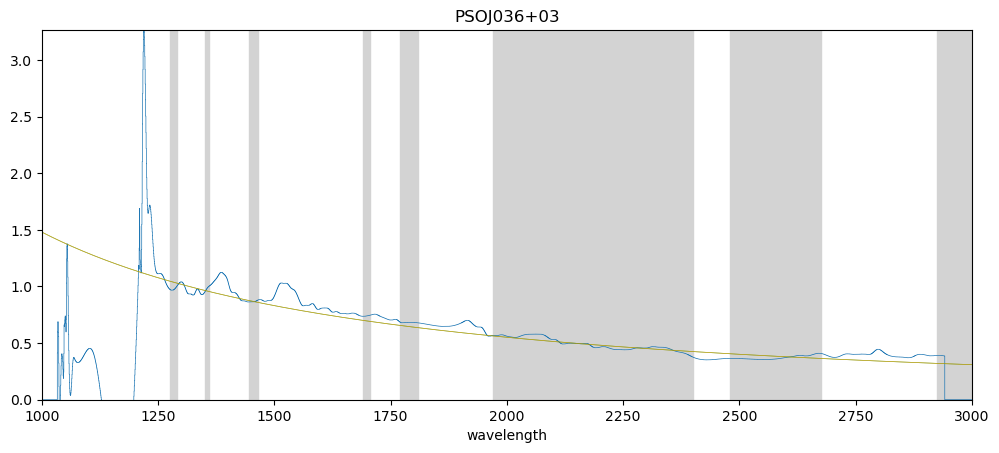

PSOJ056-16


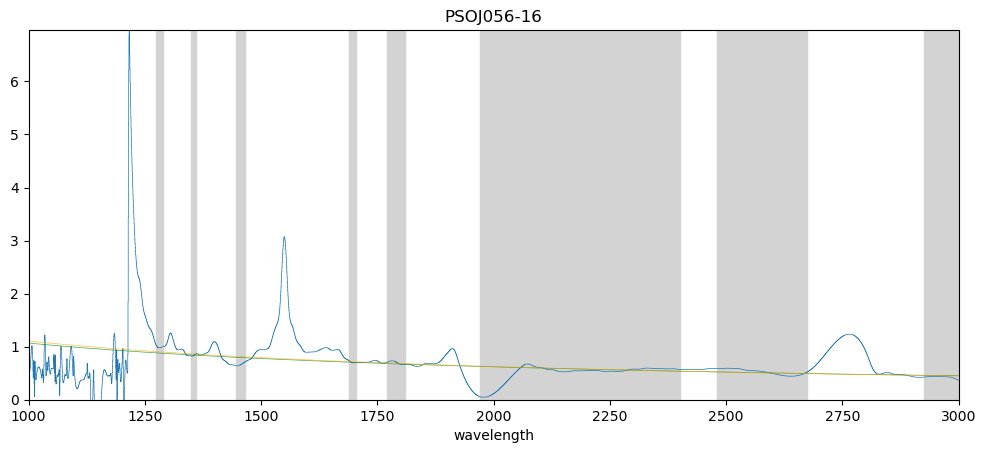

ULASJ0148+0600


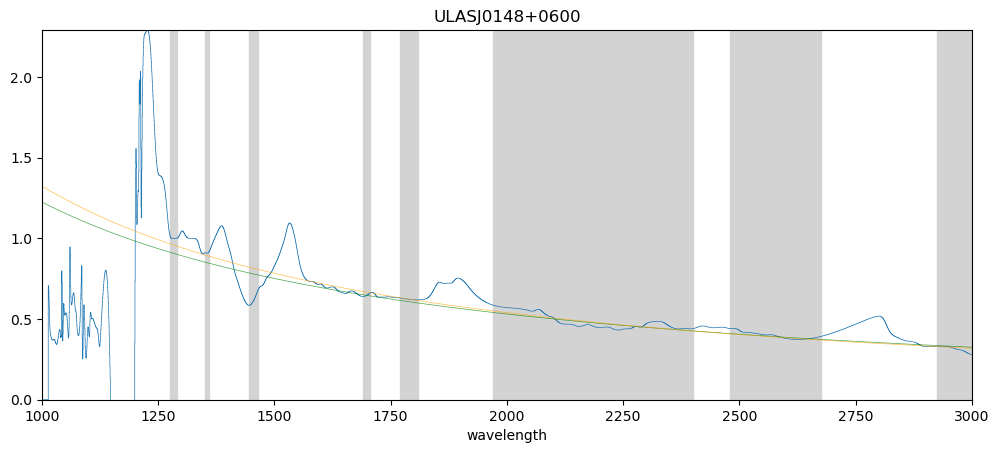

ULASJ1207+0630


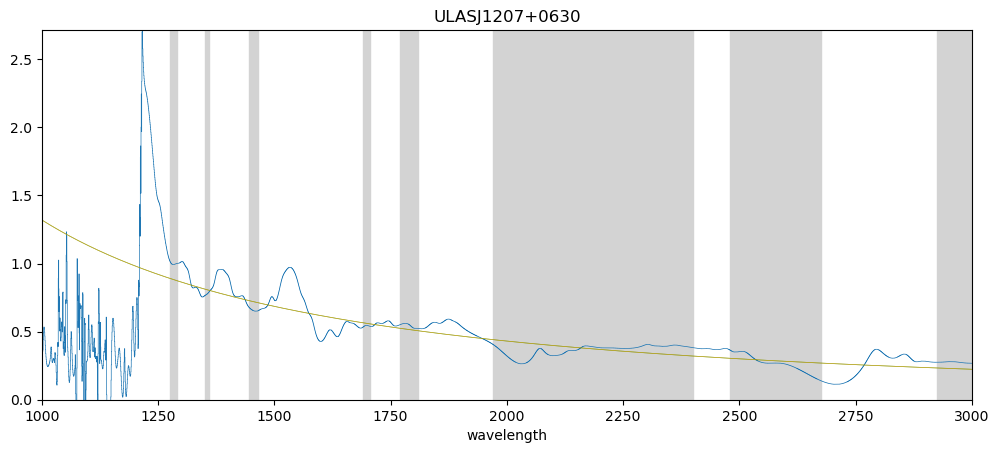

ULASJ1319+0950


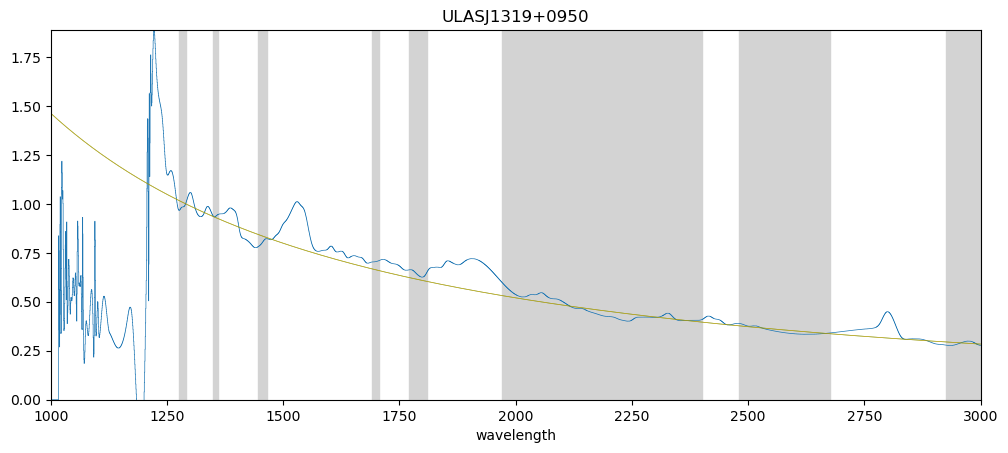

VDESJ0224-4711


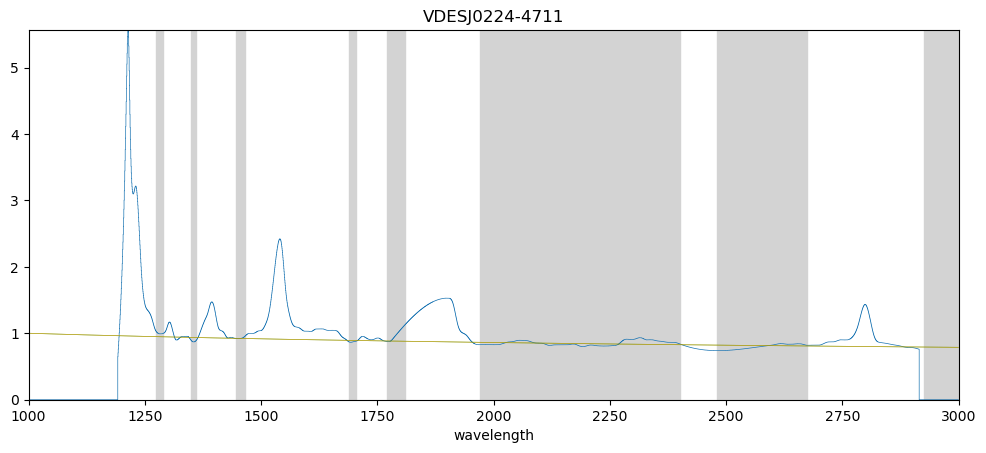

VDESJ0330-4025


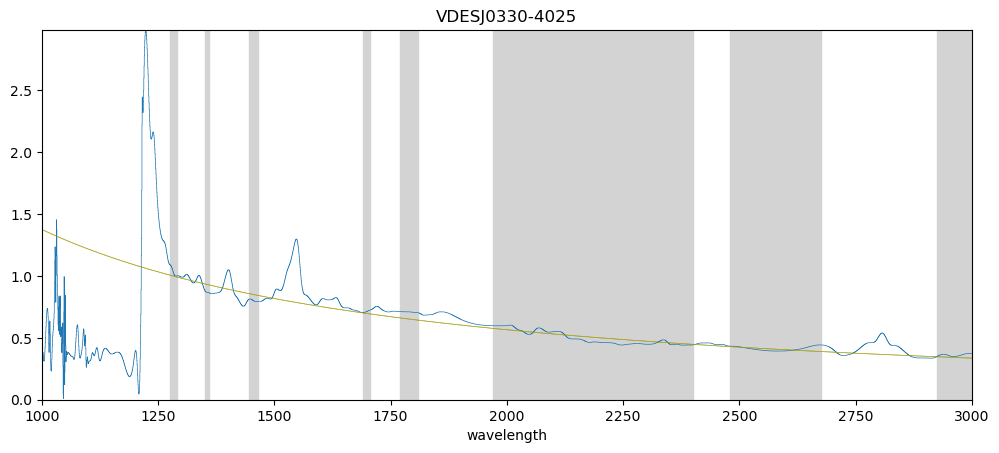

VIKJ0046-2837


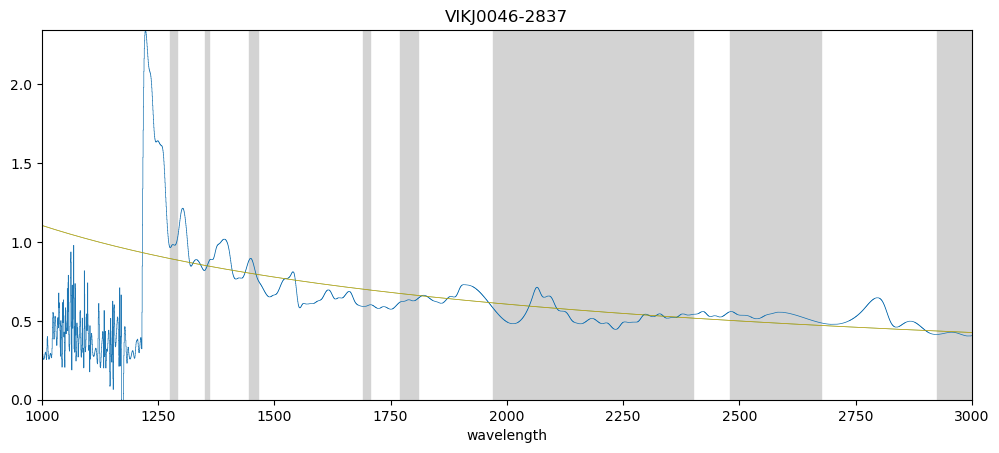

VIKJ2318-3029


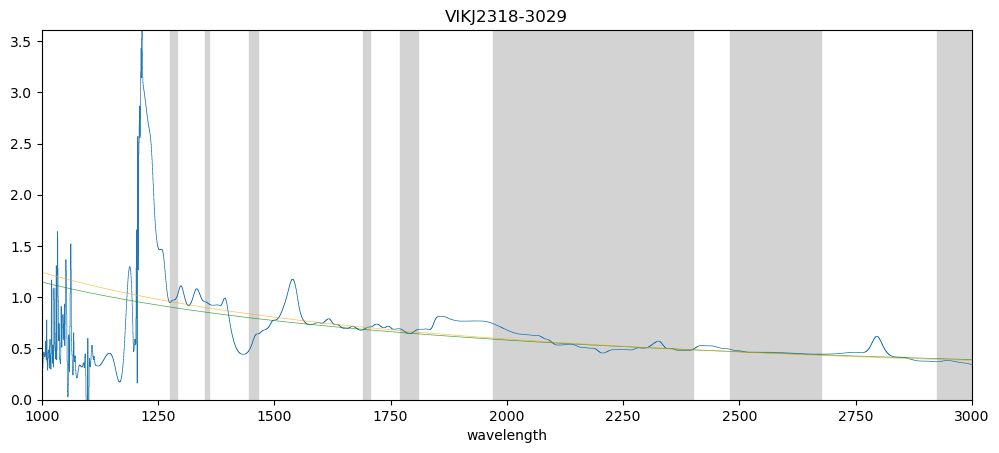

PSOJ158-14


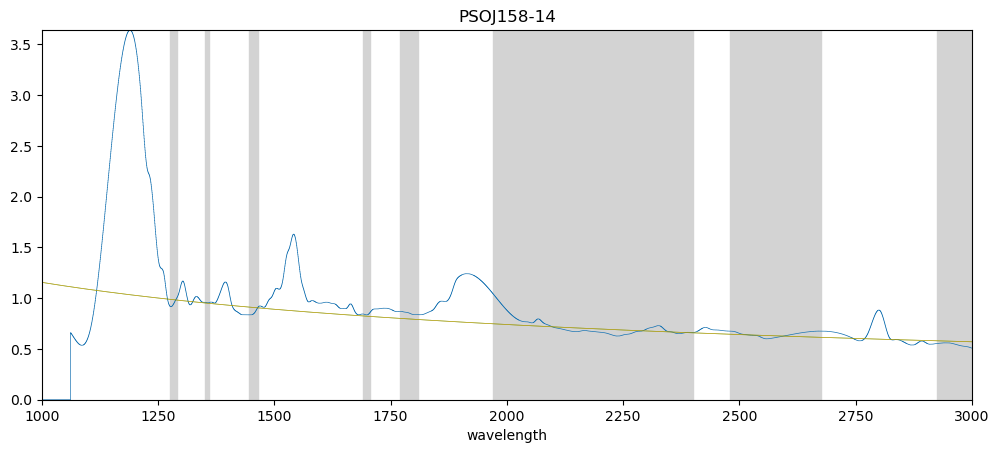

PSOJ159-02


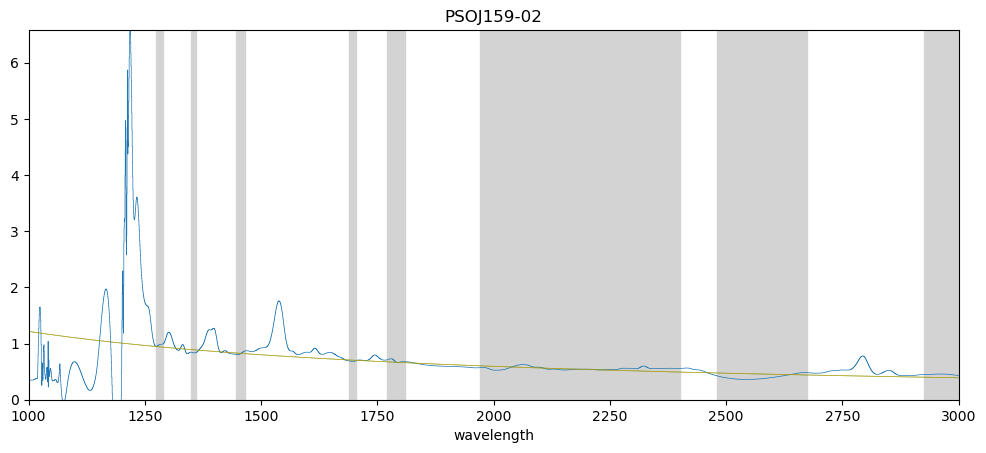

PSOJ183-12


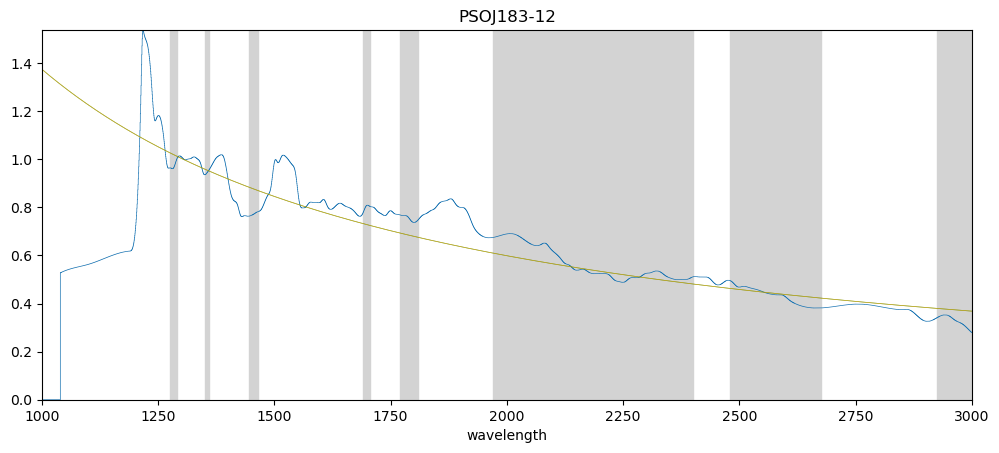

PSOJ215.1514-16.0417


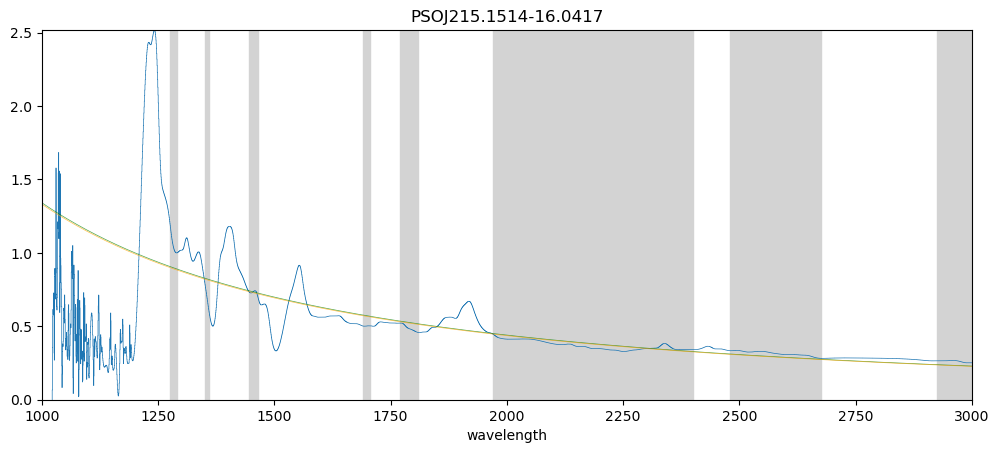

PSOJ217-16


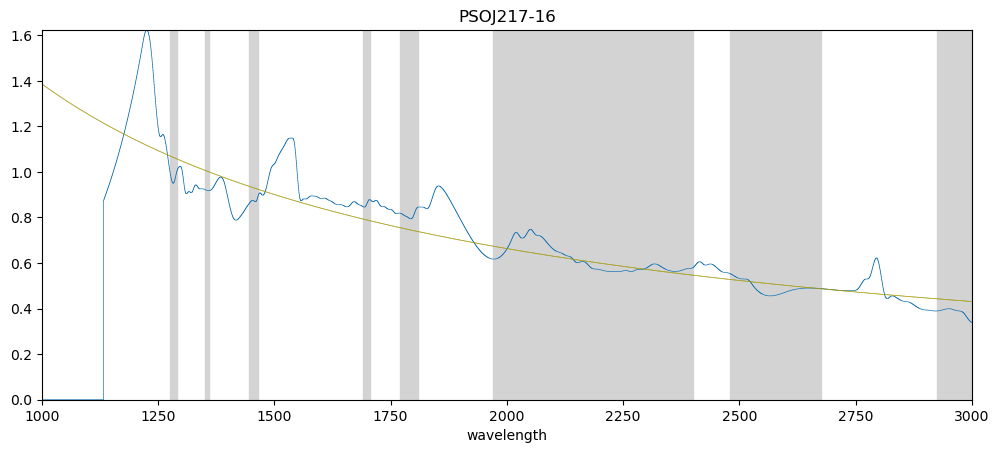

PSOJ242-12


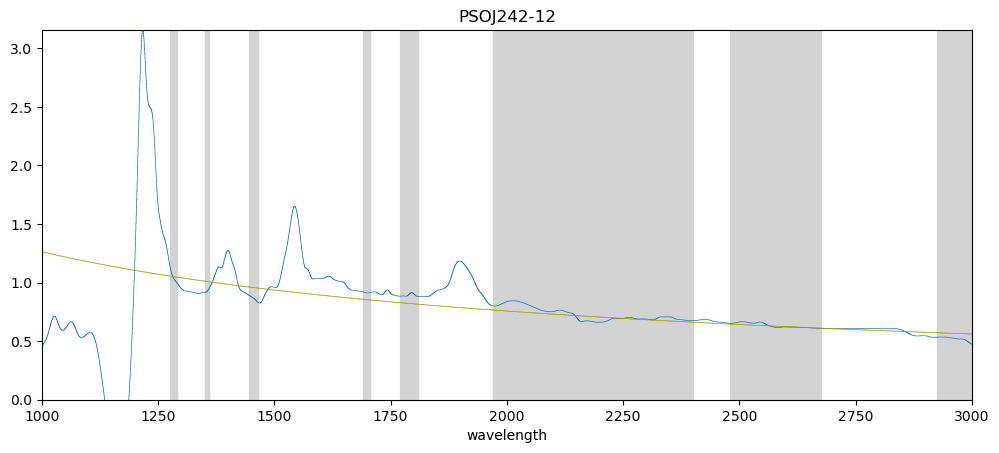

PSOJ308-21


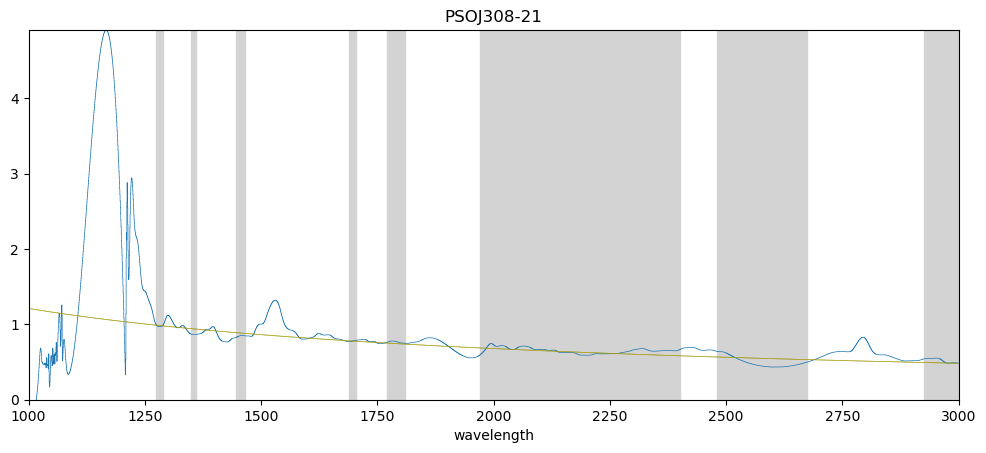

PSOJ308-27


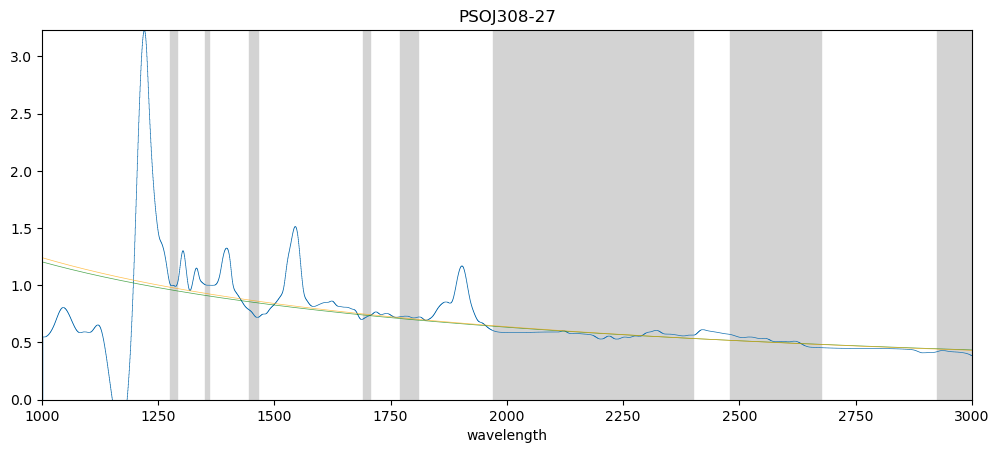

PSOJ323+12


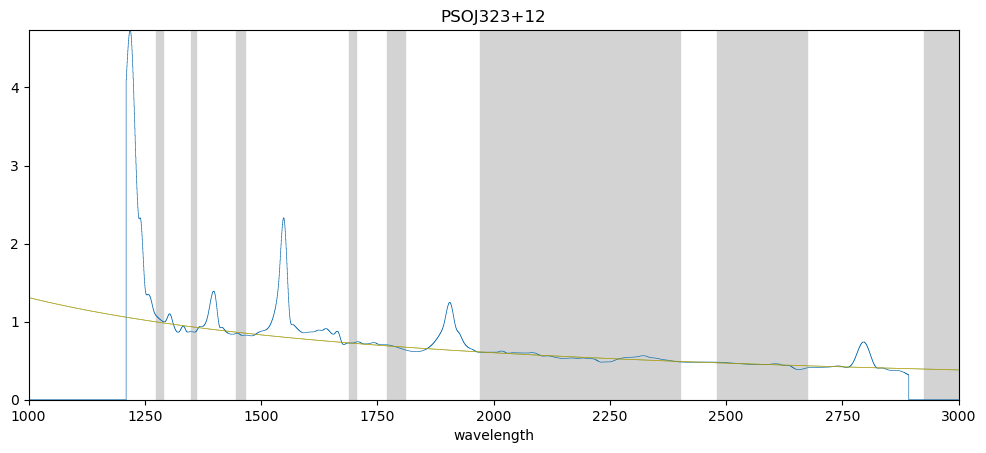

PSOJ340-18


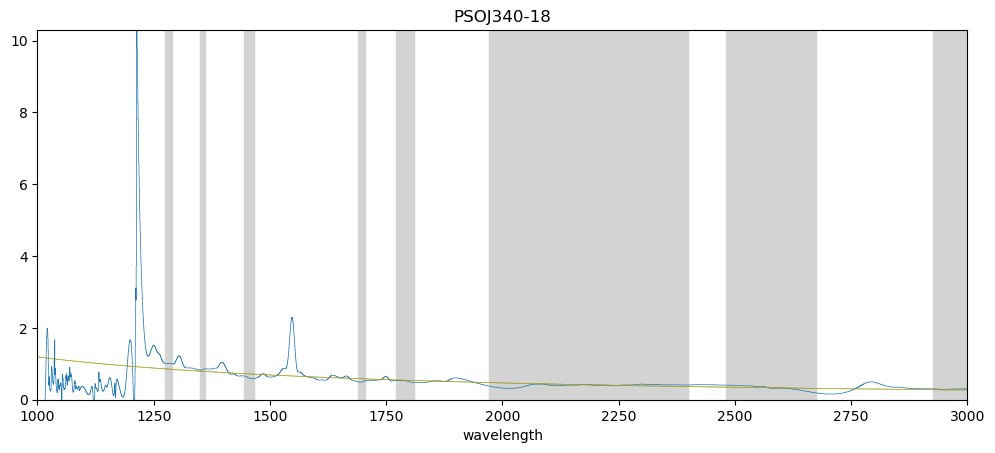

PSOJ359-06


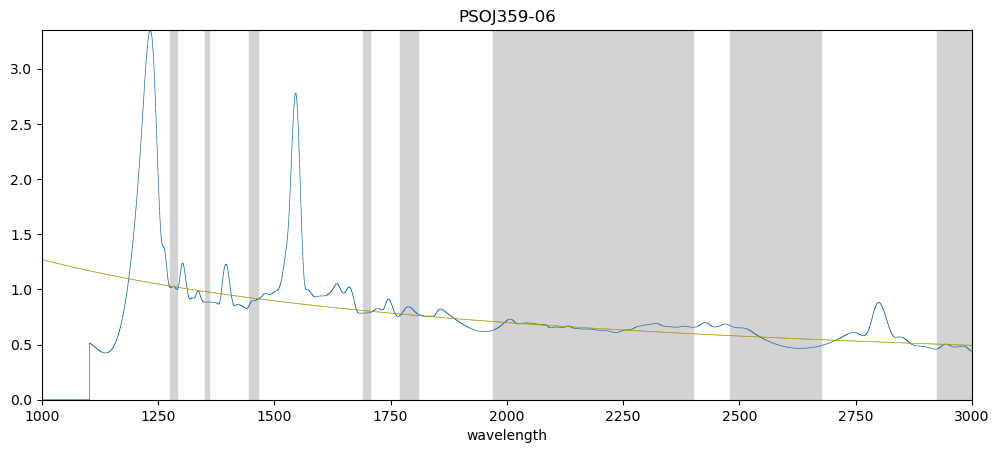

SDSSJ0100+2802


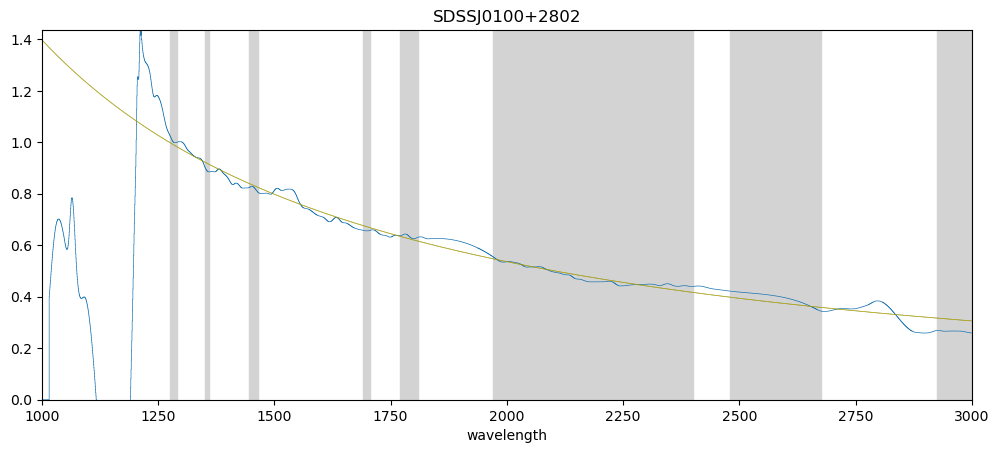

SDSSJ0818+1722


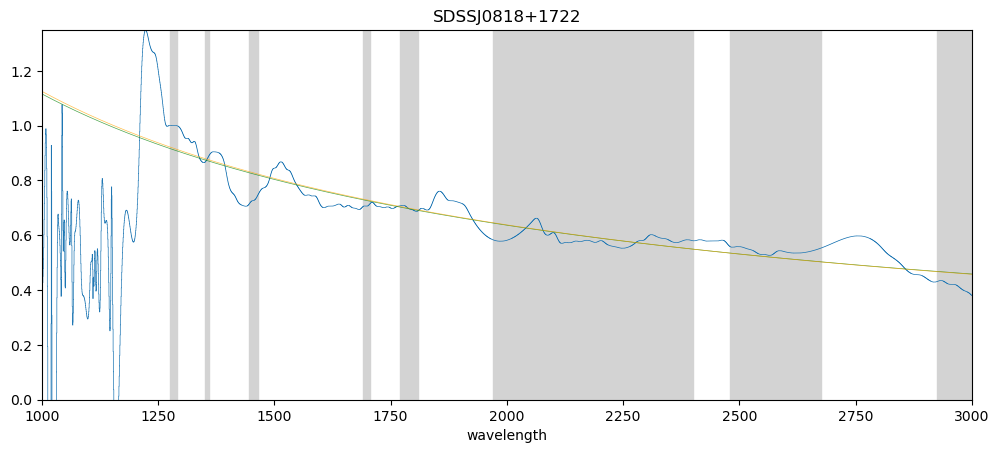

SDSSJ0836+0054


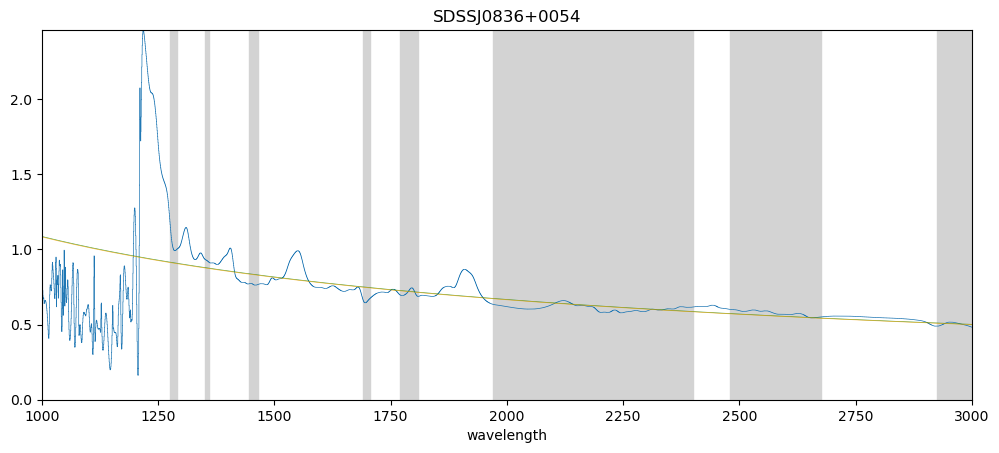

SDSSJ0927+2001


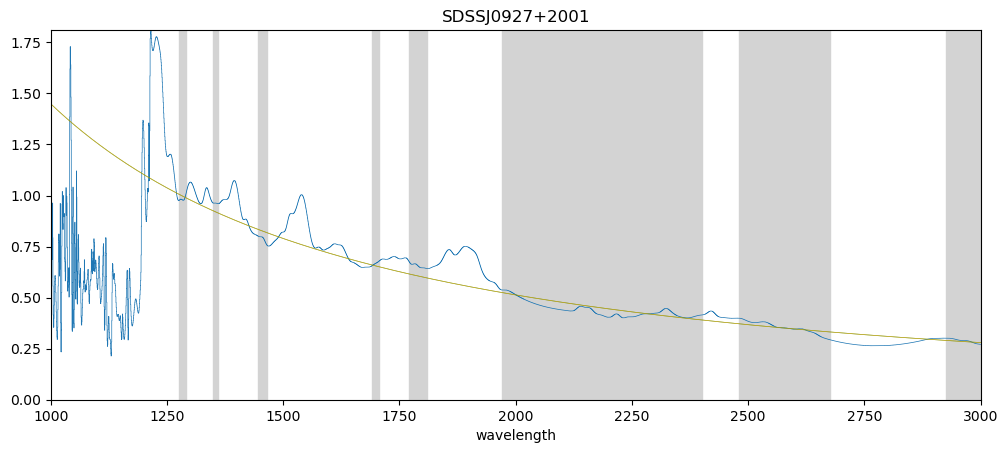

SDSSJ1030+0524


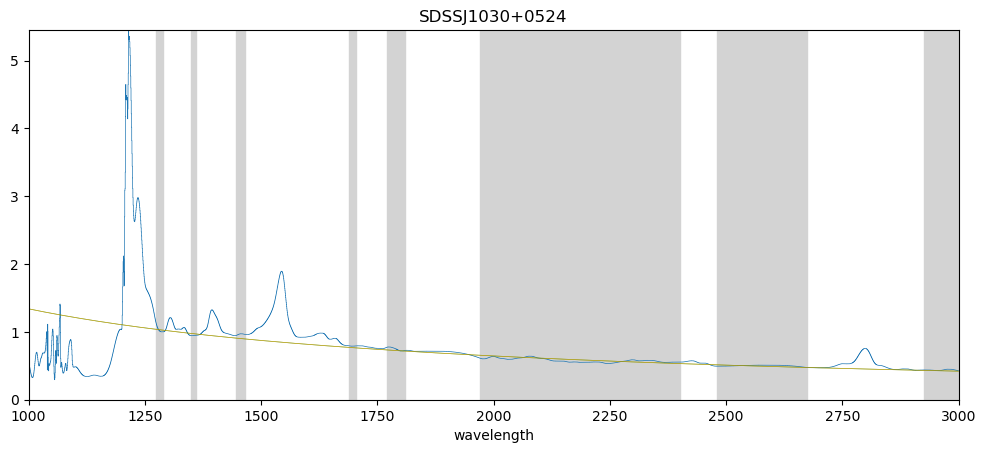

SDSSJ1306+0356


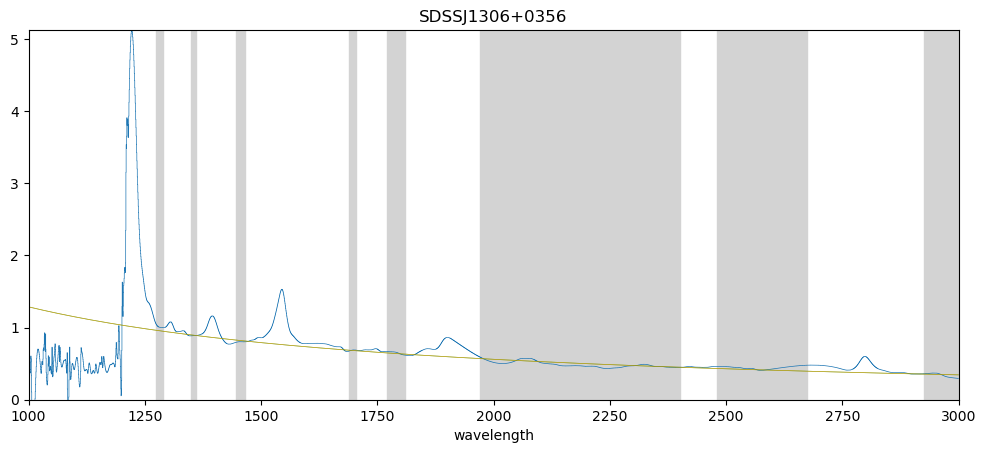

In [35]:
dpath = '/media/bartosz/USB STICK/highz_data/'
fpath = dpath + 'fits/'

nclipped = np.loadtxt(dpath + 'power_law_fits_spline_test4.txt',dtype='str')
clipped = np.loadtxt(dpath + 'power_law_fits_spline_test3.txt',dtype='str')

qnames = nclipped[:,0]
ncl_alphas = [float(f) for f in nclipped[:,1]]
ncl_betas = [float(f) for f in nclipped[:,3]]
ncl_rsq = [float(f) for f in nclipped[:,5]]

cl_alphas = [float(f) for f in clipped[:,1]]
cl_betas = [float(f) for f in clipped[:,3]]
cl_rsq = [float(f) for f in clipped[:,5]]

pp = PdfPages('plots/plfits_comp2.pdf')
for i,q in enumerate(qnames):
    print(q)
    fit = np.loadtxt(glob.glob(fpath + '{}_*.txt'.format(q))[0])

    wl,flux = fit[:,0],fit[:,1]


    fig = plt.figure()
    fig.set_figheight(4.8)
    fig.set_figwidth(12)
    plt.title(q)
#    plt.plot(wl[pmask],flux[pmask],drawstyle='steps-mid',lw=0.5)
#    plt.plot(wl[pmask],power_law(wl[pmask],*popt),alpha=0.7,lw=0.5)
#    plt.plot(wl[pmask],flux[pmask]-power_law(wl[pmask],*popt),drawstyle='steps-mid',alpha=0.7,lw=0.5)
#    plt.plot(wl[pmask],sig[pmask]-1,drawstyle='steps-mid',alpha=0.5,lw=0.5)
    plt.plot(wl,flux,drawstyle='steps-mid',lw=0.5)
    plt.plot(wl,power_law(wl,ncl_alphas[i],ncl_betas[i]),alpha=0.7,lw=0.5,color='green')
    plt.plot(wl,power_law(wl,cl_alphas[i],cl_betas[i]),alpha=0.7,lw=0.5,color='orange')
    #plt.plot(wl,flux-power_law(wl,*popt),drawstyle='steps-mid',alpha=0.7,lw=0.5)
    for j,a in enumerate(As):
        plt.axvspan(As[j],Bs[j],color='lightgrey')
    plt.xlim(1000,3000)
    plt.ylim(0,max(flux))
    plt.xlabel('wavelength')
    pp.savefig(fig)
    plt.show()
    plt.close()

pp.close()

891


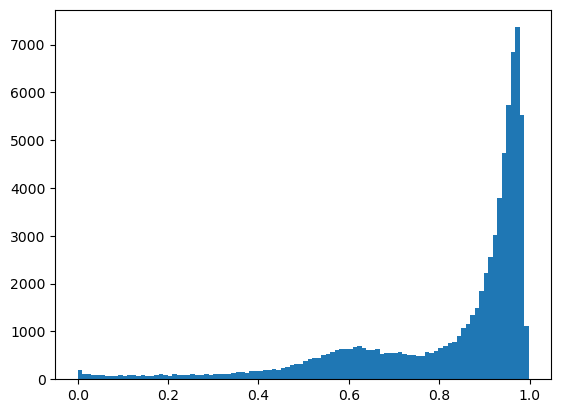

In [93]:
dpath = '/media/bartosz/USB STICK/BOSS_DR14_ext/'
fpath = dpath + 'fits/'
plfits = np.loadtxt(dpath + 'power_law_fits_spline_rsq_cl_bound.txt',dtype='str')
rsq = np.array([float(f) for f in plfits[:,6]])

counts, bins = np.histogram(rsq[rsq>0], bins=100, range=None, density=None, weights=None)
plt.hist(bins[:-1], bins, weights=counts)
#plt.yscale('log')

N = 0
for n in range(len(rsq)):
    if rsq[n]<0:
        N+=1

print(N)